# Actividad 2: Validación y evaluación en regresión y clasificación

Esta segunda actividad consiste en demostrar los conocimientos sobre validación y evaluación de algoritmos en aprendizaje supervisado, haciendo uso de los conceptos aprendidos en la asignatura.

Información general:
* La entrega consistirá en un archivo .ipynb siguiendo las instrucciones de este notebook.
* 60% de la nota final.

Instrucciones para cumplimentar el notebook:
* Descarga este notebook, que servirá como base para la entrega.
* **No hay que modificar las celdas** que vienen en la hoja de actividades, **a no ser que se especifique claramente en la celda**. Para contestar a las preguntas, por favor añade celdas inmediatamente después de cada pregunta.
* Para la nota se valorará tanto la consecución de la respuesta adecuada como el estilo y adecuación del código fuente (si procede responder con código), así como la inclusión de comentarios apropiados.
* **No está permitido compartir los resultados de una actividad** en el foro o con cualquier compañero, **salvo indicación expresa en el enunciado de la actividad**. Hacerlo puede suponer suspender la asignatura y enfrentarse a medidas disciplinarias.

Información útil:
* Para crear celdas en el notebook, usa el botón "+" del menú situado en la esquina superior izquierda.
* Para ejecutar una celda (texto o código), pulsa el botón "Run" del menú situado en la esquina superior izquierda.
* Recuerda cambiar el tipo de celda de forma adecuada con el menú superior.
* Más información sobre notebooks en la documentación oficial: https://jupyter.readthedocs.io/en/latest/

### Ejercicio 1 (1.5 puntos)

Cree un programa que permita visualizar una gráfica en la que se muestren los valores de error MAE del regresor DummyRegressor en función del porcentaje de split training/test en validación Hold-out (pruebe desde un 50%-50% hasta un 95%-5%, de 5% en 5%) para un dataset de regresión (el que se desee).

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_absolute_error

In [ ]:
# Carga de los datos
boston_dict = datasets.load_boston()

# creación de las matrices X e y
X = boston_dict["data"]
y = boston_dict["target"]

In [ ]:
# generación de los resultados por training_size
train_sizes = np.arange(50, 100, 5)/100
maes_test = [] # vector to save the MAE scores
maes_train = []

for ts in train_sizes:
    print("training size:", "{:.2f}".format(ts))
    
    # separación de los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-ts), random_state=23)
    print(f"con un train_size de {'{:.2f}'.format(ts)} se tienen {(X_train.shape[0])} datos de entrenamiento")
    
    # Entrenamiento y predicción del test
    dr = DummyRegressor()
    dr.fit(X_train, y_train)
    y_train_pred = dr.predict(X_train)
    y_test_pred = dr.predict(X_test)
          
    # evaluacion
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print(f"MAE en train: {mae_train}")
    print(f"MAE en test: {mae_test}")
          
    # guardado de resultados
    maes_train.append(mae_train)
    maes_test.append(mae_test)
    print()

In [ ]:
# Gráfica del mae en función del tamaño train-test 
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, maes_test,"*--r", label="MAE in test")
plt.plot(train_sizes, maes_train, label="MAE in train")
plt.title("MAE dummy regressor")
plt.ylabel("MAE (mean absolute error)")
plt.xlabel("Training size (proporción)")
plt.legend()
plt.grid()
plt.show()

**NOTA**: cabe aclarar que no se puede concluir ninguna relación de la gráfica de arriba.
Hay mucha sensibilidad a los elementos que queden dentro de cada test set, por lo cuál no se puede concluir que haya relación con tan solo mirar una selección de test set (para cada test_size)

Para entender si hay una relación, haremos el mismo ejercicio, solamente que para cada test_size, no realizaremos **una** sino **100** particiones. 
Es decir, para la partición 50%, crearé 100 test sets y luego miraré los estadísticos de esto. 
Para la partición 55%, crearé 100 tests distintos y de nuevo, miramos los estadísticos

In [ ]:
num_simul = 100
train_sizes = np.arange(50, 100, 5)/100
maes_test = [] # vector to save the MAE scores
maes_train = []
resultados = {}

for ts in train_sizes:
    print("training size:", "{:.2f}".format(ts))
    
    train_results = []
    test_results = []
    for i in range(num_simul):
        # separación de los datos
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-ts)) # sin random_state

        # Entrenamiento y predicción del test
        dr = DummyRegressor()
        dr.fit(X_train, y_train)
        y_train_pred = dr.predict(X_train)
        y_test_pred = dr.predict(X_test)

        # evaluacion
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)

        # guardado de resultados
        
        train_results.append(mae_train)
        test_results.append(mae_test)
    resultados[ts] = {
        "train": train_results,
        "test":test_results
    }

In [ ]:
# Captura de los estaísticos
medias = []
desvests = []
for ts in train_sizes:
    media = np.mean(resultados[ts]["test"])
    desvest = np.std(resultados[ts]["test"])
    medias.append(media)
    desvests.append(desvest)
    
medias = np.array(medias)
desvests = np.array(desvests)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, medias)
plt.fill_between(train_sizes, medias-desvests, medias+desvests,
                 facecolor="black", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill
plt.title("Relación entre la partición y MAE en test")
plt.xlabel("training size (proporción)")
plt.ylabel("MAE (mean absolute error)")
plt.show()

ahora se puede apreciar que en realidad el estimador no mejora ni empeora con % de partición distintos. 
Lo que sí se puede apreciar es que mientras más grande es el train size (más pequeño el test size) es más volátil el MAE, es decir, el error podría oscilar en un rango más alto (pero con la misma media)

### Ejercicio 2 (1.5 puntos)

Realizar el mismo procedimiento que el descrito en el Ejercicio 1, pero para clasificación con el clasificador DummyClassifier (visualizar gráfica de valores de exactitud, en lugar de MAE).

In [40]:
# carga de datos
iris_dict = datasets.load_iris()

# creación de las matrices X e y
X = iris_dict.data
y = iris_dict.target

In [41]:
# generación de los resultados por training_size
train_sizes = np.arange(50, 100, 5)/100
accs_test = [] # vector to save the MAE scores
accs_train = []

for ts in train_sizes:
    print("training size:", "{:.2f}".format(ts))
    
    # separación de los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-ts), random_state=23)
    print(f"con un train_size de {'{:.2f}'.format(ts)} se tienen {(X_train.shape[0])} datos de entrenamiento")
    
    # Entrenamiento y predicción del test
    clf = DummyClassifier()
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
          
    # evaluacion
    acc_train = clf.score(X_train, y_train)
    acc_test = clf.score(X_test, y_test)
          
    # guardado de resultados
    accs_train.append(acc_train)
    accs_test.append(acc_test)
    print()

training size: 0.50
con un train_size de 0.50 se tienen 75 datos de entrenamiento

training size: 0.55
con un train_size de 0.55 se tienen 82 datos de entrenamiento

training size: 0.60
con un train_size de 0.60 se tienen 90 datos de entrenamiento

training size: 0.65
con un train_size de 0.65 se tienen 97 datos de entrenamiento

training size: 0.70
con un train_size de 0.70 se tienen 104 datos de entrenamiento

training size: 0.75
con un train_size de 0.75 se tienen 112 datos de entrenamiento

training size: 0.80
con un train_size de 0.80 se tienen 120 datos de entrenamiento

training size: 0.85
con un train_size de 0.85 se tienen 127 datos de entrenamiento

training size: 0.90
con un train_size de 0.90 se tienen 135 datos de entrenamiento

training size: 0.95
con un train_size de 0.95 se tienen 142 datos de entrenamiento



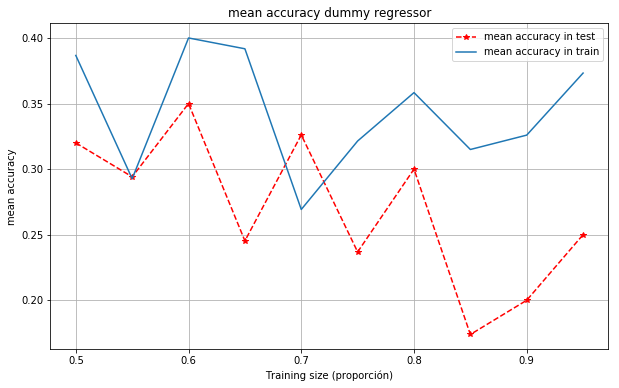

In [42]:
# Gráfica del mean accuracy en función del tamaño train-test 
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, accs_test,"*--r", label="mean accuracy in test")
plt.plot(train_sizes, accs_train, label="mean accuracy in train")
plt.title("mean accuracy dummy regressor")
plt.ylabel("mean accuracy")
plt.xlabel("Training size (proporción)")
plt.legend()
plt.grid()
plt.show()

Al igual que hicimos en el punto 1, mejor vamos a dibujar la relación entre el split y el accuracy, pero teniendo en cuenta 100 splits distintos para cada test_size

In [43]:
num_simul = 100
train_sizes = np.arange(50, 100, 5)/100
accs_test = [] # vector to save the MAE scores
accs_train = []
resultados = {}

for ts in train_sizes:
    print("training size:", "{:.2f}".format(ts))
    
    train_results = []
    test_results = []
    for i in range(num_simul):
        # separación de los datos
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-ts)) # sin random_state

        # Entrenamiento y predicción del test
        clf = DummyClassifier()
        clf.fit(X_train, y_train)
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        # evaluacion
        acc_train = clf.score(X_train, y_train)
        acc_test = clf.score(X_test, y_test)
        
        # guardado de resultados
        train_results.append(acc_train)
        test_results.append(acc_test)
        
    resultados[ts] = {
        "train": train_results,
        "test":test_results
    }

training size: 0.50
training size: 0.55
training size: 0.60
training size: 0.65
training size: 0.70
training size: 0.75
training size: 0.80
training size: 0.85
training size: 0.90
training size: 0.95


In [44]:
# Captura de los estaísticos
medias = []
desvests = []
for ts in train_sizes:
    media = np.mean(resultados[ts]["test"])
    desvest = np.std(resultados[ts]["test"])
    medias.append(media)
    desvests.append(desvest)
    
medias = np.array(medias)
desvests = np.array(desvests)

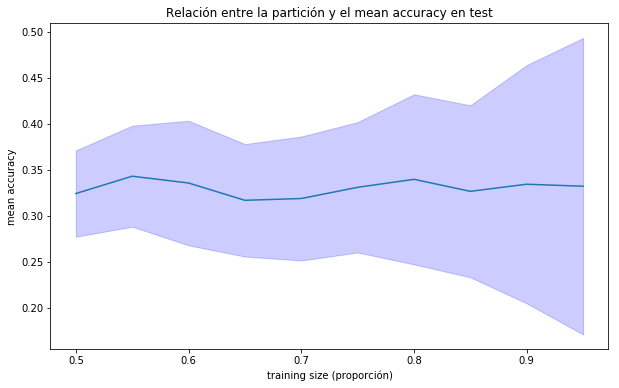

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, medias)
plt.fill_between(train_sizes, medias-desvests, medias+desvests,
                 facecolor="black", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill
plt.title("Relación entre la partición y el mean accuracy en test")
plt.xlabel("training size (proporción)")
plt.ylabel("mean accuracy")
plt.show()

De nuevo parece no haber relación entre el test_size y el mean accuracy. En este caso, el mean accuracy permanece con una media de al rededor de 0.33 y la desviación sí crece a medida que el training size se hace más grande

### Ejercicio 3 (2 puntos)

Cree un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, RMSE y MAPE usando los regresores OLS y KNN en validación cruzada con 10 bolsas. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).

### Ejercicio 4 (3 puntos)

Analice las diferencias entre los errores producidos por el algoritmo KNN en función de estos aspectos: a) número de vecinos más cercanos; b) función de distancia; c) con/sin normalización previa de atributos. Para ello, pruebe al menos dos configuraciones distintas de cada aspecto. Use tres datasets diferentes en validación leave-one-out en la comparativa de resultados.

### Ejercicio 5 (2 puntos)

Estudie la métrica para clasificación denominada AUC de scikit-learn y cree un programa, con comentarios que aclaren el código, donde se compute diche métrica (junto con exactitud, precisión, recall y F1) usando los clasificadores LOGR y CART en validación cruzada leave-one-out. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).